In [2]:
### Design a Time Series Deviation using LSTM 

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import gdown


%matplotlib inline
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

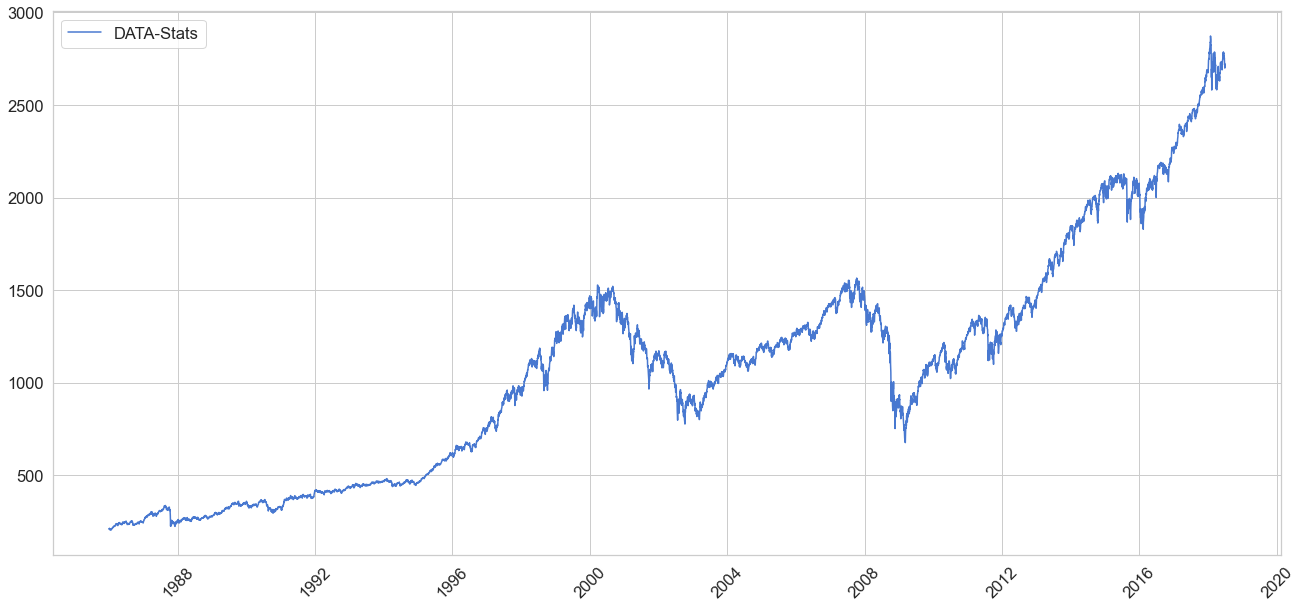

In [5]:
# Read dataset from spx 
#-------------------------------


df = pd.read_csv('data.csv', parse_dates=['Time'], index_col='Time')
#print(df.head(50));
plt.plot(df["Stat"], label='DATA-Stats')

plt.legend();
plt.xticks(rotation=45)
plt.savefig("plt1.png");

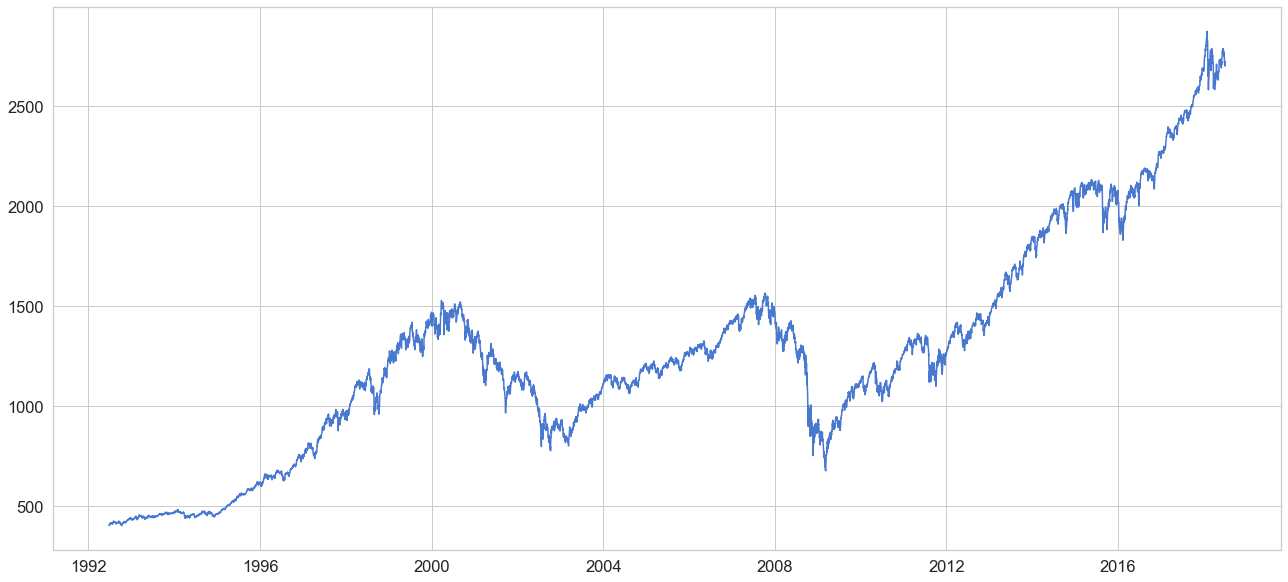

In [6]:
# Train/Test Split Data

test_percent = 0.8
test_point = np.round(len(df)*test_percent)
test_ind = int(len(df)-test_point)
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]



from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Stat']])
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
plt.plot(test, label='DATA-Stats')

In [7]:
# Create Generator Data 
# tensor flow 2.2.0

from keras.preprocessing.sequence import TimeseriesGenerator
#help(TimeseriesGenerator)
length=30
batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size = batch_size)
len(scaled_train)

1638

In [8]:
# Model 
from keras.models import Sequential 
from keras import layers
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM


n_feat = 1

model = Sequential();
#model.add(layers.SimpleRNN(50, input_shape=(length, n_feat)))
model.add(layers.LSTM(50, return_sequences=True, input_shape=(length, n_feat)))
model.add(layers.LSTM(50))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(generator,epochs=6, verbose=1)

Epoch 1/6
1608/1608 [==============================] - 16s 10ms/step - loss: 5.0119e-04
Epoch 2/6
1608/1608 [==============================] - 17s 10ms/step - loss: 5.4815e-04
Epoch 3/6
1608/1608 [==============================] - 17s 11ms/step - loss: 4.2038e-04
Epoch 4/6
1608/1608 [==============================] - 18s 11ms/step - loss: 4.5022e-04 0s - l
Epoch 5/6
1608/1608 [==============================] - 17s 11ms/step - loss: 3.8326e-04
Epoch 6/6
1608/1608 [==============================] - 17s 11ms/step - loss: 4.0500e-04


<AxesSubplot:>

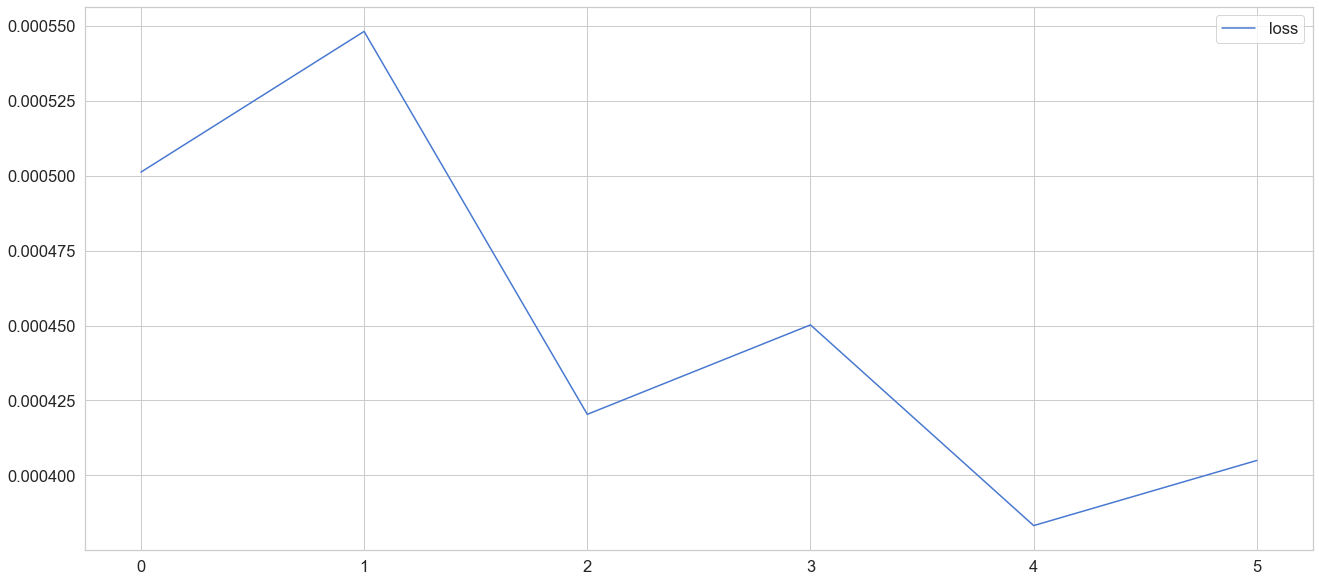

In [11]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [12]:
# PREDICTIONS on TRaining 

test_predictions = []
print (type(scaled_train))
print ((scaled_train.shape))




j = len(scaled_train)-length
#j = 100 ; # faster run fake

#eval_batch = scaled_train

for i in range(j):
    eval_batch = scaled_train[i:i+length]
    shifted_batch = eval_batch.reshape((1,length,n_feat))
    this_pred = model.predict(shifted_batch)
    this_pred = this_pred[0]
    test_predictions.append(this_pred)
    eval_batch = eval_batch[1:];
    b = np.array([this_pred])
   
    
    #eval_batch = np.append(eval_batch, b,axis=0); # USE THIS TO SHIFT IN DATA INSTEAD OF INPUT
    ####shifted_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1); # Slide prediction into batch
    #shifted_batch = np.append(shifted_batch[:,1:,:],[[this_pred]], axis=1); # Slide input sequence by 1 
    #print(eval_batch.shape)
    
test_predictions


<class 'numpy.ndarray'>
(1638, 1)


[array([0.0716241], dtype=float32),
 array([0.07672022], dtype=float32),
 array([0.08505655], dtype=float32),
 array([0.09497488], dtype=float32),
 array([0.08667748], dtype=float32),
 array([0.09617217], dtype=float32),
 array([0.10452668], dtype=float32),
 array([0.10434471], dtype=float32),
 array([0.10329995], dtype=float32),
 array([0.10451709], dtype=float32),
 array([0.11422549], dtype=float32),
 array([0.11500716], dtype=float32),
 array([0.11047053], dtype=float32),
 array([0.10712238], dtype=float32),
 array([0.1067735], dtype=float32),
 array([0.10923239], dtype=float32),
 array([0.11064963], dtype=float32),
 array([0.11435078], dtype=float32),
 array([0.13278082], dtype=float32),
 array([0.1364299], dtype=float32),
 array([0.1403037], dtype=float32),
 array([0.1534726], dtype=float32),
 array([0.14735761], dtype=float32),
 array([0.15254478], dtype=float32),
 array([0.15199284], dtype=float32),
 array([0.15581943], dtype=float32),
 array([0.14421558], dtype=float32),
 array

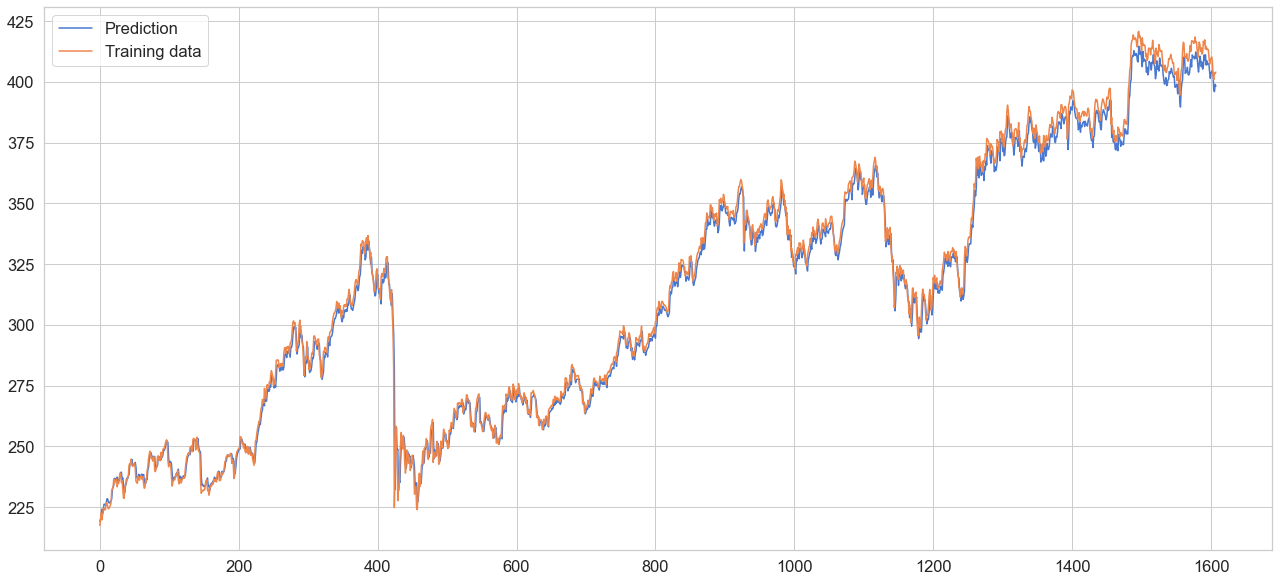

In [14]:
# PREDICTIONS on TRaining - PLOTS

orig_predictions = scaler.inverse_transform(test_predictions)
eval_batch = scaler.inverse_transform(scaled_train[length:]) ; # length = 30 units 
plt.plot(orig_predictions,label='Prediction')
plt.plot(eval_batch,label='Training data')
plt.legend()
plt.show()



#for i in range(100):
#    print(orig_predictions[i],eval_batch[i])


In [26]:
# PREDICTIONS TEST DATA

test_predictions = []
#print (type(scaled_test))
#print ((scaled_test.shape))




j = len(scaled_test)-length


for i in range(j):
    eval_batch = scaled_test[i:i+length]
    shifted_batch = eval_batch.reshape((1,length,n_feat))
    this_pred = model.predict(shifted_batch)
    this_pred = this_pred[0]
    test_predictions.append(this_pred)
    eval_batch = eval_batch[1:];
    b = np.array([this_pred])
    
    
    #eval_batch = np.append(eval_batch, b,axis=0); # USE THIS TO SHIFT IN DATA INSTEAD OF INPUT
    ####shifted_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1); # Slide prediction into batch
    #shifted_batch = np.append(shifted_batch[:,1:,:],[[this_pred]], axis=1); # Slide input sequence by 1 
    #print(eval_batch.shape)
    
test_predictions

[array([0.9733757], dtype=float32),
 array([0.9674518], dtype=float32),
 array([0.9605126], dtype=float32),
 array([0.964297], dtype=float32),
 array([0.9613555], dtype=float32),
 array([0.95624423], dtype=float32),
 array([0.9567634], dtype=float32),
 array([0.96718484], dtype=float32),
 array([0.9695112], dtype=float32),
 array([0.9717173], dtype=float32),
 array([0.9562645], dtype=float32),
 array([0.95890015], dtype=float32),
 array([0.9426154], dtype=float32),
 array([0.9251328], dtype=float32),
 array([0.9322721], dtype=float32),
 array([0.94061154], dtype=float32),
 array([0.9391497], dtype=float32),
 array([0.94524163], dtype=float32),
 array([0.9404481], dtype=float32),
 array([0.9507683], dtype=float32),
 array([0.95853907], dtype=float32),
 array([0.9571569], dtype=float32),
 array([0.95291775], dtype=float32),
 array([0.9410317], dtype=float32),
 array([0.9521725], dtype=float32),
 array([0.96804744], dtype=float32),
 array([0.9635986], dtype=float32),
 array([0.9910965], d

6554
6524


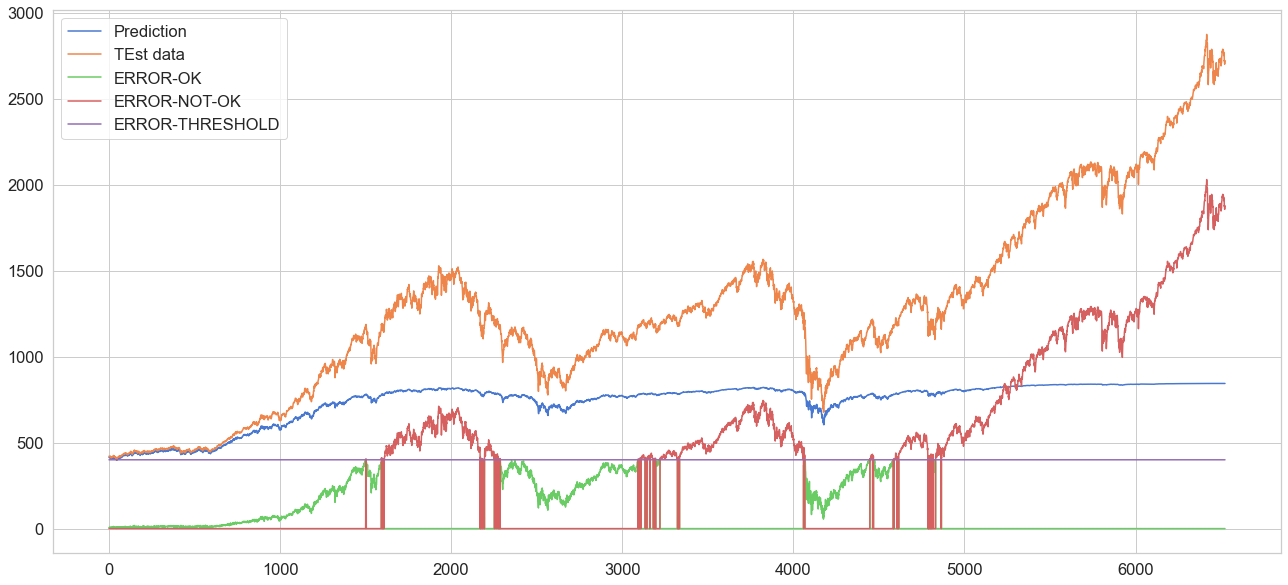

In [25]:
orig_predictions = scaler.inverse_transform(test_predictions)
eval_batch = scaler.inverse_transform(scaled_test) ; # length = 30 units 


# PREDICTIONS 
err_predictions_ok = []
err_predictions_nok = []
err_thresh = []
j = len(orig_predictions)
print(len(eval_batch))
print(len(orig_predictions))


for i in range(j):
    e = abs(eval_batch[length+i]-orig_predictions[i])
   
    th = 400;err_thresh.append(th);
    if (e[0] >th) :
         err_predictions_nok.append(e[0]);err_predictions_ok.append(0);   
    else :
        err_predictions_nok.append(0);err_predictions_ok.append(e[0]);   
      
    

    
    
    

plt.plot(orig_predictions,label='Prediction')
plt.plot(eval_batch[length:],label='TEst data')
plt.plot(err_predictions_ok,label='ERROR-OK');
plt.plot(err_predictions_nok,label='ERROR-NOT-OK');
plt.plot(err_thresh,label='ERROR-THRESHOLD');
plt.legend()
plt.show()



#for i in range(100):
#    print(orig_predictions[i],eval_batch[i])